In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

In [2]:
if IN_COLAB:
  from google.colab import drive

  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls 'drive/My Drive'



'Colab Notebooks'  'Dm data viz'   donut.png   SentiMix.txt


# Case Study: Sentiment Analysis

First stage of our competition. 

The work to be done is as follows:
1. Feature extraction and baseline
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
    * <span style="color:red">You have to send me your notebook</span>
1. My first neural network
    * reuse the features already extracted 
    * proposed a neural network built with Keras
    * <span style="color:red">You have to send me your notebook</span>
<span style="color:red">
1. <span style="color:red">Hyper-parameter fitting
    * for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
    * for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop
    </span>
1. <span style="color:red">Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 2 build a network that simultaneously uses Keras' embedding and the features extracted in the first weeks.
    </span>



**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.

# First 3 Weeks Work

In [0]:
import numpy as np
import pandas as pd

In [5]:
#Question 1
if IN_COLAB:
  pwd = "drive/My Drive/SentiMix.txt"
else:
  pwd = "C:\\Users\\rapho\\OneDrive\\Bureau\\MSc DATA SCIENCE\\machine learning\\SentiMix.txt"
txt = pd.read_csv(pwd,  encoding="utf8")
txt

meta\t3\tnegative
0                     @\tO
1       AdilNisarButt\tHin
2            pakistan\tHin
3                  ka\tHin
4                ghra\tHin
...                    ...
367338           kuch\tHin
367339            bhi\tHin
367340           nahi\tHin
367341        karenge\tHin
367342                .\tO

[367343 rows x 1 columns]

In [0]:
def read(file,nb_lines=0):
    with open(file,'r', encoding="utf8")as f:
        for i, line in enumerate(f.readlines()):
            print(line,end=" ")
            if i>nb_lines:
                return                     

In [8]:
texte=read("C:\\Users\\rapho\\OneDrive\\Bureau\\MSc DATA SCIENCE\\machine learning\\SentiMix.txt",10)

FileNotFoundError: ignored

In [0]:
def read(file,nb_lines=0):
    with open(file,'r',encoding="utf8")as f:
        df=pd.DataFrame({'id':[],
                        'review':[],
                        'lang':[],
                        'sentiment':[]})
        
        id = []
        for line in f.readlines():
            tokens = line.strip().split('\t')
            if tokens[0]=='meta':
                if id!=[]:
                    df.loc[len(df)]=[id,
                                    review,
                                    lang,
                                    sentiment]
                    if nb_lines!=0 and len(df)==nb_lines:
                        
                        return df
                id=tokens[1]
                sentiment=tokens[2]
                review=[]
                lang=[]
            elif tokens[0]!="":
                if len(tokens)==2:
                    review +=[tokens[0]]
                    lang +=[tokens[1]]
                        
        return df          

In [0]:
df=read("C:\\Users\\rapho\\OneDrive\\Bureau\\MSc DATA SCIENCE\\machine learning\\SentiMix.txt", nb_lines=15)

In [0]:
df

id                                             review  \
0     3  [@, AdilNisarButt, pakistan, ka, ghra, tauq, h...   
1    41  [Madarchod, mulle, ye, mathura, me, Nahi, dikh...   
2    48  [@, narendramodi, Manya, Pradhan, Mantri, maho...   
3    64  [@, Atheist, _, Krishna, Jcb, full, trend, me,...   
4    66  [@, AbhisharSharma, _, @, RavishKumarBlog, Lok...   
5    68  [@, noirnaveed, @, AngelAhana6, @, cricketworl...   
6    90  [Love, u, Bhaijan, ...♥♥, Father, +, son, .., ...   
7    99  [@, manojgajjar111, Tumhara, pass, abh, deemag...   
8   101  [@, Mahlogo, _, nolo, Weni, ankere, o, gae, th...   
9   104  [@, Aurangzeb, _, AIMIM, @, SachinS40805591, L...   
10  106  [@, reema, _, omer, @, BushraGohar, @, QasimKh...   
11  146  [@, cooladitaya, @, khanumarfa, Ye, sale, is, ...   
12  150  [@, HYUN7lN, saf, baby, ((, i, ’, m, sorry, i,...   
13  157  [@, Nevveon, Real, life, k, log, chor, diye, h...   
14  167  [@, mjdawar, Mohsin, DawarTweets, daikho, aur,...   

                                                 lang sentiment  
0   [O, Hin, Hin, Hin, Hin, Hin, Eng, Eng, Eng, En...  negative  
1   [Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hin, ...  negative  
2   [O, Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hi...  positive  
3   [O, Eng, O, Eng, Eng, Eng, Eng, Eng, Hin, Hin,...  positive  
4   [O, Hin, O, O, Hin, Eng, Hin, Hin, Hin, Hin, H...  positive  
5   [O, Eng, O, Eng, O, Eng, Eng, Hin, Hin, Hin, H...  negative  
6   [Hin, Hin, Eng, O, Eng, O, Eng, O, O, Hin, O, ...  positive  
7   [O, Eng, Eng, Hin, Hin, Hin, Hin, Hin, Eng, En...  negative  
8   [O, Hin, O, Eng, Eng, Hin, Hin, Hin, Eng, Eng, O]  positive  
9   [O, Hin, O, Eng, O, Eng, Eng, Hin, Hin, Hin, H...  negative  
10  [O, Eng, O, Eng, O, Eng, O, Hin, O, Eng, O, Hi...  negative  
11  [O, Hin, O, Hin, Hin, Hin, Hin, Hin, Hin, Hin,...  negative  
12  [O, Hin, Hin, Hin, O, Hin, O, Eng, Hin, Hin, H...  positive  
13  [O, Eng, Eng, Eng, Hin, Hin, Hin, Hin, Hin, Hi...  negative  
14  [O, Eng, Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hi...  negative

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vec3 = TfidfVectorizer()
vec3.fit(df)
X = vec3.transform(df).toarray()

pd.DataFrame(X, columns=sorted(vec.vocabulary_.keys()))

id  lang  review  sentiment
0  1.0   0.0     0.0        0.0
1  0.0   0.0     1.0        0.0
2  0.0   1.0     0.0        0.0
3  0.0   0.0     0.0        1.0

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False)
vec = cv.fit(df)
vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2)

In [0]:
cv2=CountVectorizer(stop_words='english',binary=False,
                  max_df=0.95,min_df=0.05,
                  ngram_range=(1,1))

In [0]:
X_train_enc =cv2.fit(X_train)
X_test_enc =cv2.fit(X_test)

In [0]:
Xtrainfinal=X_train_enc.transform(X_train)
Xtestfinal=X_test_enc.transform(X_test)

In [0]:
Xtrainfinal #pb dimension

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [0]:
Xtrainfinal.toarray()
Xtestfinal.toarray()

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=int64)

## 1. Read the dataset

Could you find below a proposal. You can complete them.

In [6]:
# to read the data
def read(file,nb_lines=0):
    with open(file,'r', encoding="utf8")as f:
        for i, line in enumerate(f.readlines()):
            print(line,end=" ")
            if i>nb_lines:
                return
df=read(pwd,10)

meta	3	negative
 @	O
 AdilNisarButt	Hin
 pakistan	Hin
 ka	Hin
 ghra	Hin
 tauq	Hin
 he	Eng
 Pakistan	Eng
 Israel	Eng
 ko	Eng
 tasleem	Hin
 

In [0]:
# changing the data to dataframe

import pandas as pd
import numpy as np

def read(file,nb_lines=0):
    with open(file,'r',encoding="utf8")as f:
        df=pd.DataFrame({'id':[],
                        'review':[],
                        'lang':[],
                        'sentiment':[]})
        
        id = []
        for line in f.readlines():
            tokens = line.strip().split('\t')
            if tokens[0]=='meta':
                if id!=[]:
                    df.loc[len(df)]=[id,
                                    review,
                                    lang,
                                    sentiment]
                    if nb_lines!=0 and len(df)==nb_lines:
                        
                        return df
                id=tokens[1]
                sentiment=tokens[2]
                review=[]
                lang=[]
            elif tokens[0]!="":
                if len(tokens)==2:
                    review +=[tokens[0]]
                    lang +=[tokens[1]]
                        
        return df 
    read(path+"train_conll.txt", 2).head()       

In [8]:
df=read(pwd,10)
df

id  ... sentiment
0    3  ...  negative
1   41  ...  negative
2   48  ...  positive
3   64  ...  positive
4   66  ...  positive
5   68  ...  negative
6   90  ...  positive
7   99  ...  negative
8  101  ...  positive
9  104  ...  negative

[10 rows x 4 columns]

In [0]:
from sklearn.model_selection import train_test_split

''' Define X_train and X_valid '''

df_train = read(pwd, 2000)
df_train, df_valid = train_test_split(df_train, test_size=0.3)

In [11]:
''' Put your code here '''
X_train = df_train['review']
y_train = df_train['sentiment']

''' Define X_valid and y_valid '''
X_valid = df_valid['review']
y_valid = df_valid['sentiment']


X_valid.shape, y_valid.shape

((600,), (600,))

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_valid_enc = encoder.transform(y_valid)

nb_classes = len(np.unique(y_train_enc))
nb_classes

3

## 2. Text normalisation

It's your job

In [13]:
#remove upper case
X_train1 = [[t.lower() for t in i]for i in X_train]
print(X_train1)

[['rt', '@', 'hrithikstaan', 'salary', 'aagaya', 'baas', 'ab', '#', 'super30', 'ka', 'aur', 'ek', 'poster', 'aa', 'jaye', '2', 'days', 'to', '#', 'super30', 'trailer', '😍', 'and', 'a', 'dream', 'come', 'true', '🙈'], ['@', 'mishra', '_', 'jiiiii', '@', 'naalayuck', 'social', 'media', 'pe', 'ye', '(', 'kripaya', 'apne', 'kaam', 'se', 'matlab', 'rakhe', ')', 'ye', 'bat', 'sobha', 'nahi', 'deti', 'aap', 'ko', '…', 'https', '//', 't', 'co', '/', '6emt0yxc9e'], ['@', 'sanjaynirupam', 'bilkul', 'sahi', 'he', 'nirupam', 'kyunki', 'congress', 'ke', 'paas', 'kuch', 'nahi', 'bacha', 'ab', 'to', 'ja', 'ke', 'bolege', 'bhi', 'kya', '?', 'galiya', '?…', 'https', '//', 't', '.', 'co', '/', 'th3kgcuinc'], ['@', 'antani', '_', 'harsh', '@', 'aroraups', 'bilkul', 'sir', '.....', 'patel', 'ji', '...', 'wali', 'reflection', 'h', '....', 'shah', 'ji', 'ki', '...', 'hume', 'toh', 'proud', 'h', '...', 'apne', 'pu', '…', 'https', '//', 't', '.', 'co', '/', 'kgd1zb75jc'], ['@', 'prof', '_', 'hariom', '@', 'nar

In [63]:
len(X_train1)

1400

In [65]:
X_train1[2][1]

'sanjaynirupam'

In [66]:
len(X_train1[2])

30

In [0]:
listetoremove=['"','.',';','🤗', '@','❤', '//','😂😂😂😂', '😂', '&', '👌♥🔥', '💓💓💓', '...♥♥', '+', '-', '#', '(((', 
               '...', '?', '!',"$", '*', '/', '❤😘', '😍😘☺❤💓', '😜', '🥺', '👍🏻', '🤣🤣🤣🤣🤣', '😒', '🙏', '❤️❤️', '??😹😹']
               #pourtant les emoticones sont définies par EMT et ne devrait logiquement pas être dans notre liste de mot anglais
               #liste à enrichir

In [79]:
#remove all the punctuation and the smileys
for i in range(2):
  for j in range(10):
    if X_train1[i][j] in listetoremove:
      del X_train1[i][j]
print(X_train1)

[['rt', 'hrithikstaan', 'salary', 'aagaya', 'baas', 'ab', 'super30', 'ka', 'aur', 'ek', 'poster', 'aa', 'jaye', '2', 'days', 'to', 'super30', 'trailer', '😍', 'and', 'a', 'dream', 'come', 'true', '🙈'], ['mishra', '_', 'jiiiii', 'naalayuck', 'social', 'media', 'pe', 'ye', '(', 'kripaya', 'apne', 'kaam', 'se', 'matlab', 'rakhe', ')', 'ye', 'bat', 'sobha', 'nahi', 'deti', 'aap', 'ko', '…', 'https', '//', 't', 'co', '/', '6emt0yxc9e'], ['@', 'sanjaynirupam', 'bilkul', 'sahi', 'he', 'nirupam', 'kyunki', 'congress', 'ke', 'paas', 'kuch', 'nahi', 'bacha', 'ab', 'to', 'ja', 'ke', 'bolege', 'bhi', 'kya', '?', 'galiya', '?…', 'https', '//', 't', '.', 'co', '/', 'th3kgcuinc'], ['@', 'antani', '_', 'harsh', '@', 'aroraups', 'bilkul', 'sir', '.....', 'patel', 'ji', '...', 'wali', 'reflection', 'h', '....', 'shah', 'ji', 'ki', '...', 'hume', 'toh', 'proud', 'h', '...', 'apne', 'pu', '…', 'https', '//', 't', '.', 'co', '/', 'kgd1zb75jc'], ['@', 'prof', '_', 'hariom', '@', 'narendramodi', '@', 'swarajy

In [87]:
#remove all the punctuation and the smileys
for i in range(len(X_train1)):
  for j in range(len(X_train1[i])):
    if X_train1[i][-j+1] in listetoremove:
      del X_train1[i][-j+1]
#à reprendre la semaine pro

IndexError: ignored

In [14]:
# Stop words removal in NLTK:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#nltk.download() # download nltk packages

stop = stopwords.words('english')

#stop words removal
  
filtered_sent=[[word for word in a if not word in stop] for a in X_train1]

#print("Tokenized Sentence:",X_train1)
print("Filtered Sentence:",filtered_sent)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Filtered Sentence: [['rt', '@', 'hrithikstaan', 'salary', 'aagaya', 'baas', 'ab', '#', 'super30', 'ka', 'aur', 'ek', 'poster', 'aa', 'jaye', '2', 'days', '#', 'super30', 'trailer', '😍', 'dream', 'come', 'true', '🙈'], ['@', 'mishra', '_', 'jiiiii', '@', 'naalayuck', 'social', 'media', 'pe', 'ye', '(', 'kripaya', 'apne', 'kaam', 'se', 'matlab', 'rakhe', ')', 'ye', 'bat', 'sobha', 'nahi', 'deti', 'aap', 'ko', '…', 'https', '//', 'co', '/', '6emt0yxc9e'], ['@', 'sanjaynirupam', 'bilkul', 'sahi', 'nirupam', 'kyunki', 'congress', 'ke', 'paas', 'kuch', 'nahi', 'bacha', 'ab', 'ja', 'ke', 'bolege', 'bhi', 'kya', '?', 'galiya', '?…', 'https', '//', '.', 'co', '/', 'th3kgcuinc'], ['@', 'antani', '_', 'harsh', '@', 'aroraups', 'bilkul', 'sir', '.....', 'patel', 'ji', '...', 'wali', 'reflection', 'h', '....', 'shah', 'ji', 'ki', '...', 'hume', 'toh', 'proud', 'h', '...', 'apne', 'p

## 3. Feature extraction

Could you find below a proposal. You can complete them.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)

X_train_enc = cv.fit_transform(X_train.apply(' '.join)).toarray()
X_valid_enc = cv.transform(X_valid.apply(' '.join)).toarray()

## 4. Build baseline

Could you find below a proposal. You can complete them.

In [0]:
from sklearn.linear_model import LogisticRegression
from joblib import dump

model = LogisticRegression(multi_class='auto')
model.fit(X_train_enc, y_train)
dump(model, 'LogisticRegression.joblib');

## 5. Evaluate

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

model1 = load('LogisticRegression.joblib')
y_pred = model1.predict(X_valid_enc)

precision, recall, fscore, support = precision_recall_fscore_support(y_valid, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 0.5315856923893338
* R: 0.5233333333333333
* F: 0.5260800110691971


## My first score - without text normalisation, with BinaryVectorizer and  logistic regression

**A very naive approach**

* P: 0.548
* R: 0.549
* F: 0.548

 ## <span style="color:red">Build your own keras model<span>

In [0]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras import utils


In [0]:
# This returns a tensor
inputs = Input(shape=(X_train_enc.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(1)(inputs)
output_2 = Dense(1)(output_1)
predictions = Dense(1)(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [24]:
utils.print_summary(model)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 9258)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9259      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 9,263
Trainable params: 9,263
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


In [27]:
X_train_enc.shape

(1400, 9258)

In [28]:
y_train.shape

(1400,)

In [29]:
history = model.fit(X_train_enc, y_train_enc, epochs=100, validation_data=[X_valid_enc, y_valid_enc])
model.save("keras_mlp.h5")




Train on 1400 samples, validate on 600 samples
Epoch 1/100





1400/1400 [==============================] - 10s 7ms/step - loss: 0.8140 - mean_absolute_error: 0.7483 - val_loss: 0.6068 - val_mean_absolute_error: 0.6536
Epoch 2/100
1400/1400 [==============================] - 0s 146us/step - loss: 0.5411 - mean_absolute_error: 0.6067 - val_loss: 0.5481 - val_mean_absolute_error: 0.6258
Epoch 3/100
1400/1400 [==============================] - 0s 143us/step - loss: 0.4759 - mean_absolute_error: 0.5710 - val_loss: 0.5086 - val_mean_absolute_error: 0.6021
Epoch 4/100
1400/1400 [==============================] - 0s 142us/step - loss: 0.4320 - mean_absolute_error: 0.5450 - val_loss: 0.5026 - val_mean_absolute_error: 0.6026
Epoch 5/100
1400/1400 [==============================] - 0s 135us/step - loss: 0.4008 - mean_absolute_error: 0.5270 - val_loss: 0.4871 - val_mean_absolute_error: 0.5870
Epoch 6/100
1400/1400 [==============================] - 0s 133us/step - loss: 0.3722 - mean_absolute

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


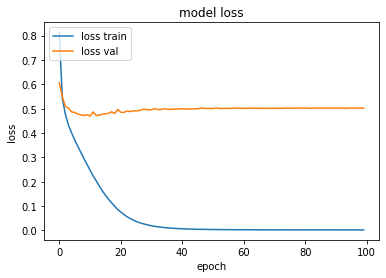

In [31]:
# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

In [32]:
model.metrics_names

['loss', 'mean_absolute_error']

In [33]:
model.evaluate(X_valid_enc, y_valid_enc)

600/600 [==============================] - 0s 84us/step


[0.5023721996943156, 0.5805454436937968]

Third Week: Hyper-parameter fitting
- for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
- for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv3=CountVectorizer(stop_words='english',binary=False, max_df=0.80,min_df=0.20, max_features=200,
                  ngram_range=(1,1))
cv3

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=200, min_df=0.2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Early stop



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00202: early stopping


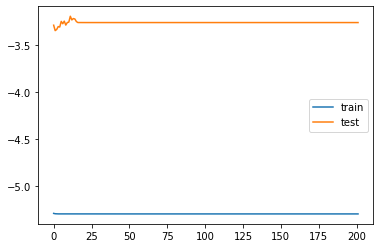

0.4983333341280619

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Sequential, load_model
from matplotlib import pyplot

# Change patience from 1 to 200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

mc= ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# define model
model = load_model("keras_mlp.h5")
#model.add(Dense(500, input_dim=2, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_enc,y_train_enc, validation_data=(X_valid_enc,y_valid_enc), epochs=4000, verbose=0, callbacks=[es, mc])

model.save("best_model.h5")

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, test_acc = saved_model.evaluate(X_valid_enc, y_valid_enc, verbose=0)
test_acc

In [0]:
X_train_enc = cv3.fit_transform(X_train.apply(' '.join)).toarray()
X_valid_enc = cv3.transform(X_valid.apply(' '.join)).toarray()

In [0]:
# This returns a tensor
inputs = Input(shape=(X_train_enc.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(4, activation="relu")(inputs) #4 neurons and 4 layers
output_2 = Dense(4)(output_1)
output_3=Dense(4)(output_2)
output_4=Dense(4)(output_3)
predictions = Dense(4)(output_4)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# using earlystop and modelcheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#increasing the number of epoches and adda batch_size
history = model.fit(X_train_enc, y_train_enc, epochs=300,batch_size=128, validation_data=[X_valid_enc, y_valid_enc],callbacks=[es,mc])
model.save("model_1")



Train on 1400 samples, validate on 600 samples
Epoch 1/300
1400/1400 [==============================] - 0s 334us/step - loss: 4.0657 - acc: 0.3414 - val_loss: 3.7279 - val_acc: 0.3117
Epoch 2/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.3043 - acc: 0.2886 - val_loss: 3.4508 - val_acc: 0.3133
Epoch 3/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.0126 - acc: 0.3043 - val_loss: 3.2933 - val_acc: 0.2633
Epoch 4/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.1236 - acc: 0.2700 - val_loss: 3.5955 - val_acc: 0.2633
Epoch 5/300
1400/1400 [==============================] - 0s 34us/step - loss: 3.1826 - acc: 0.2707 - val_loss: 3.3885 - val_acc: 0.2650
Epoch 6/300
 128/1400 [=>............................] - ETA: 0s - loss: 3.0807 - acc: 0.2188

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 34us/step - loss: 3.0542 - acc: 0.3057 - val_loss: 3.3282 - val_acc: 0.3100
Epoch 7/300
1400/1400 [==============================] - 0s 34us/step - loss: 2.9802 - acc: 0.3321 - val_loss: 3.2049 - val_acc: 0.3100
Epoch 8/300
1400/1400 [==============================] - 0s 49us/step - loss: 2.2528 - acc: 0.3171 - val_loss: 1.4166 - val_acc: 0.3067
Epoch 9/300
1400/1400 [==============================] - 0s 38us/step - loss: 1.3856 - acc: 0.3336 - val_loss: 1.3845 - val_acc: 0.3067
Epoch 10/300
1400/1400 [==============================] - 0s 33us/step - loss: 1.3923 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 11/300
1400/1400 [==============================] - 0s 38us/step - loss: 1.3863 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 12/300
1400/1400 [==============================] - 0s 41us/step - loss: 1.3863 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 13/300
1400/1400 [==============================] -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


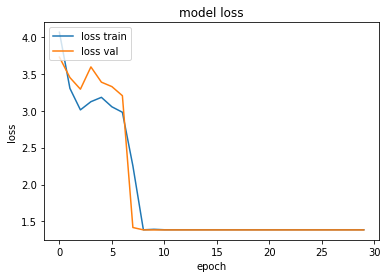

In [39]:
# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

# Week 4: Word embedding with Keras


In [0]:
from keras.preprocessing.text import Tokenizer

FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 4_000 # Max size of the vocabulary in review

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train1)

# encode documents
X_train_enc2 = tokenizer.texts_to_sequences(X_train1)
X_valid_enc2 = tokenizer.texts_to_sequences(X_valid)


In [0]:
from keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 24     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc2 = pad_sequences(X_train_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_valid_enc2 = pad_sequences(X_valid_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

# Week 4: Build neural network


Could you find below a proposal. You can complete them.

In [57]:
import keras
from keras.models import Model
from keras.layers import Input, Dropout, Dense, Embedding, Flatten, LSTM
from keras import utils

EMBEDDING_SIZE = 50

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

flatten = Flatten()(embedding) 

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu')(flatten)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(nb_classes, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

utils.print_summary(model)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 24)                0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 24, 50)            200000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                19216     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
Total params: 219,379
Trainable params: 219,379
Non-trainable params: 0
_____________________________________________________

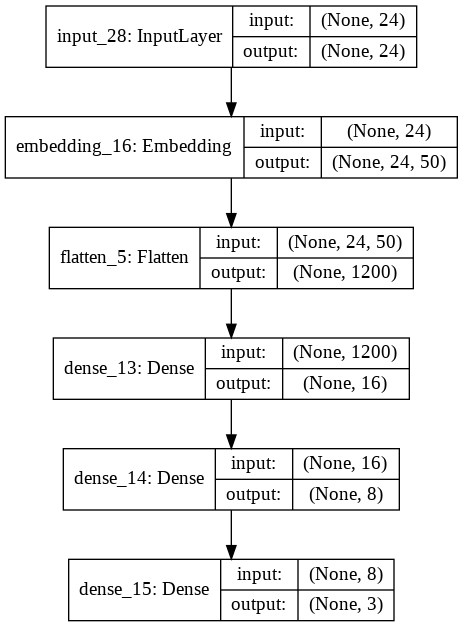

In [58]:
from IPython.display import Image
from keras.utils import plot_model


plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')
Image(retina=False, filename='model2.png')

In [28]:
X_train_enc2.shape

(1400, 24)

In [29]:
y_train_enc.shape

(1400,)

In [30]:
X_valid_enc2.shape

(600, 24)

In [31]:
y_valid_enc.shape

(600,)

In [59]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h5")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 0s 260us/step - loss: 1.0932 - accuracy: 0.3836 - val_loss: 1.0858 - val_accuracy: 0.3633

Epoch 00001: val_accuracy improved from -inf to 0.36333, saving model to best_model.h5
Epoch 2/500
1400/1400 [==============================] - 0s 132us/step - loss: 1.0448 - accuracy: 0.4743 - val_loss: 1.0557 - val_accuracy: 0.3767

Epoch 00002: val_accuracy improved from 0.36333 to 0.37667, saving model to best_model.h5
Epoch 3/500
1400/1400 [==============================] - 0s 117us/step - loss: 0.8673 - accuracy: 0.5864 - val_loss: 0.9984 - val_accuracy: 0.4333

Epoch 00003: val_accuracy improved from 0.37667 to 0.43333, saving model to best_model.h5
Epoch 4/500
1400/1400 [==============================] - 0s 125us/step - loss: 0.5880 - accuracy: 0.7936 - val_loss: 0.9997 - val_accuracy: 0.4700

Epoch 00004: val_accuracy improved from 0.43333 to 0.47000, saving model to best_model.h5
Epoc

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


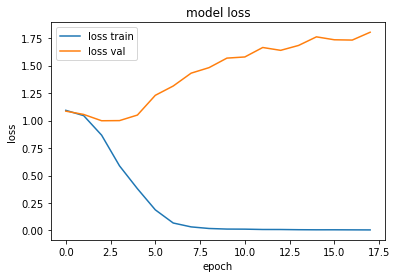

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

# Week 4: Evaluate

In [61]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h5')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

==================== validation set
* P: 0.5713694094126257
* R: 0.485
* F: 0.4623859937856359


## My score

**2000 items for training / 2000 items for validation**

* Logistic regression with BinaryVect without preprocessing
    * F: 0.558
* MLP [16, 8, 3] - 100 epochs with BinaryVect, without lemmatization
    * F: 0.561
* MLP [16, 8, 3] with early stopping without preprocessing
    * F: 0.569
* MLP [16, 8, 3] with lines=24, Keras embedding, early stopping without preprocessing
    * F: 0.541
    

# Week 4: Network that simultaneously uses Keras' embedding and the features previously extracted 

In [0]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input
from keras.layers.merge import Dot

In [52]:
# inputs
w_inputs = Input(shape=(X_train_enc.shape[1],))
w = flatten

# context
c_inputs = Input(shape=(X_train_enc.shape[1],))
c  = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=9248)(c_inputs)
#print(c.shape)
#o = Dot(axes=2)([w, c])
#o = Reshape((1,), input_shape=(1, 1))(o)
#o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=c)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 9248)              0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 9248, 50)          200000    
Total params: 200,000
Trainable params: 200,000
Non-trainable params: 0
_________________________________________________________________


In [54]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('model_6', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h6")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 0s 106us/step - loss: 0.4261 - accuracy: 0.8900 - val_loss: 1.1545 - val_accuracy: 0.4750

Epoch 00001: val_accuracy improved from -inf to 0.47500, saving model to model_6
Epoch 2/500
1400/1400 [==============================] - 0s 90us/step - loss: 0.4180 - accuracy: 0.8957 - val_loss: 1.1632 - val_accuracy: 0.4750

Epoch 00002: val_accuracy did not improve from 0.47500
Epoch 3/500
1400/1400 [==============================] - 0s 105us/step - loss: 0.4094 - accuracy: 0.8993 - val_loss: 1.1761 - val_accuracy: 0.4717

Epoch 00003: val_accuracy did not improve from 0.47500
Epoch 4/500
1400/1400 [==============================] - 0s 106us/step - loss: 0.4013 - accuracy: 0.9021 - val_loss: 1.1800 - val_accuracy: 0.4700

Epoch 00004: val_accuracy did not improve from 0.47500
Epoch 5/500
1400/1400 [==============================] - 0s 108us/step - loss: 0.3935 - accuracy: 0.9071 - val_loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


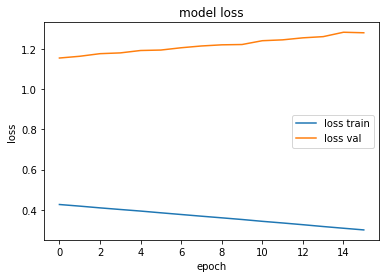

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

In [56]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h6')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

==================== validation set
* P: 0.46103548656001464
* R: 0.455
* F: 0.4544243238220204
